In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r"C:\Users\Raghuram\Downloads\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Visualization

<AxesSubplot:>

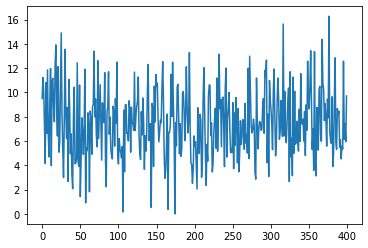

In [48]:
data['Sales'].plot()

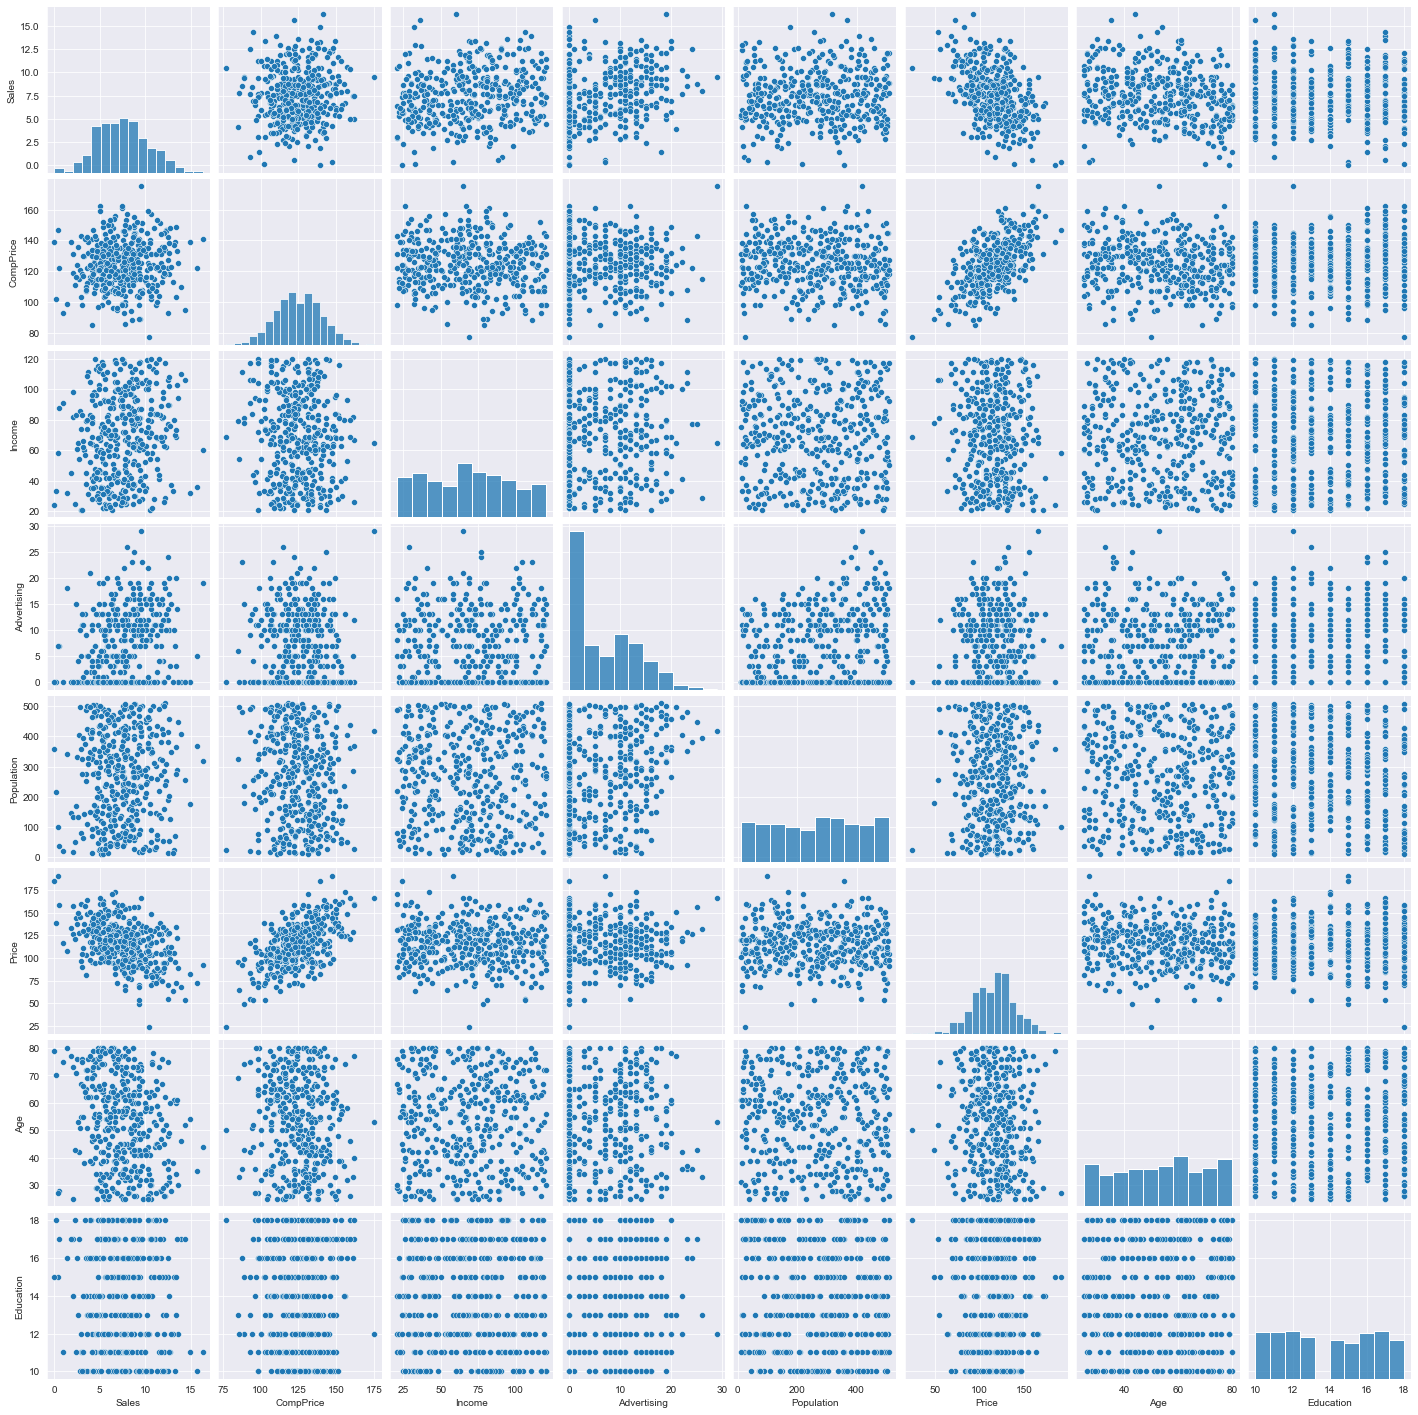

In [50]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

In [52]:
sns.lmplot(x="Sales", y="CompPrice", col="Income", hue="Income", data=data,
           col_wrap=2, ci=None, palette="muted", height=10,
           scatter_kws={"s": 50, "alpha": 1})

# First four moments and overview of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.mean()

Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [6]:
data.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [7]:
data.kurt()

Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [8]:
data.var()

Sales              7.975626
CompPrice        235.147243
Income           783.218239
Advertising       44.227343
Population     21719.813935
Price            560.584436
Age              262.449618
Education          6.867168
dtype: float64

In [9]:
data.std()

Sales            2.824115
CompPrice       15.334512
Income          27.986037
Advertising      6.650364
Population     147.376436
Price           23.676664
Age             16.200297
Education        2.620528
dtype: float64

# Correlation

In [10]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# PPS score

In [11]:
import ppscore as pps 

In [12]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


# EDA 

In [13]:
Data = pd.get_dummies(data=data,columns=['ShelveLoc','Urban','US'])

In [14]:
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [15]:
Data.shape

(400, 15)

# Model building 

# Decision tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
array = Data.values
x = array[:,1:]
y = array[:,0]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [19]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [20]:
pred_y = model.predict(x_test)
pred_y

array([ 7.4 ,  5.36,  5.31,  9.31,  9.01,  5.99,  4.95, 11.82, 11.17,
        8.61,  7.72,  9.64,  7.54,  9.43,  8.19,  5.87,  6.53,  6.52,
        8.43,  6.53,  2.67,  7.5 ,  3.45,  8.71,  8.47,  9.14,  2.52,
       10.  ,  0.37, 11.93,  9.09,  8.22,  8.43, 10.04,  9.01,  7.3 ,
        5.71,  3.45,  0.  ,  8.22])

In [21]:
error = pred_y-y_test

In [22]:
error

array([-3.04, -1.16, -4.19,  2.89,  0.7 ,  1.25, -0.69, -3.81,  2.84,
        3.28,  1.52,  1.  ,  2.02, -1.08,  1.24, -4.23,  0.56, -4.07,
        2.02,  1.36, -2.9 , -2.51, -0.17,  2.51, -0.21,  3.2 , -3.04,
       -1.99, -5.03,  2.9 , -3.44, -0.01, -3.11, -1.44,  0.01, -0.65,
        0.81, -2.23, -2.93,  2.49])

In [23]:
model.score(x_test,y_test)

0.1621080769597889

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor = RandomForestRegressor(n_estimators=100,criterion='mse')

In [26]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
y_pred = regressor.predict(x_test)

In [28]:
y_pred

array([ 8.8156,  6.3166,  6.1559,  6.2422,  7.333 ,  4.6982,  6.0147,
       12.515 , 10.2244,  6.4973,  8.9614,  8.3031,  6.7458, 10.6419,
        7.8055,  7.2041,  7.3143,  8.6791,  8.8738,  4.1396,  6.2031,
        9.5595,  5.1791,  7.4182,  8.7724,  6.8806,  5.4557, 11.9669,
        4.8436, 10.6714, 10.7943,  7.6169,  9.6325,  9.5   ,  8.1001,
        6.8839,  4.9265,  4.7883,  5.0768,  5.7834])

In [29]:
error = y_pred-y_test

In [30]:
error

array([-1.6244, -0.2034, -3.3441, -0.1778, -0.977 , -0.0418,  0.3747,
       -3.115 ,  1.8944,  1.1673,  2.7614, -0.3369,  1.2258,  0.1319,
        0.8555, -2.8959,  1.3443, -1.9109,  2.4638, -1.0304,  0.6331,
       -0.4505,  1.5591,  1.2182,  0.0924,  0.9406, -0.1043, -0.0231,
       -0.5564,  1.6414, -1.7357, -0.6131, -1.9075, -1.98  , -0.8999,
       -1.0661,  0.0265, -0.8917,  2.1468,  0.0534])

In [31]:
regressor.score(x_test,y_test)

0.7022804242077525

In [32]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

In [33]:
rmse

1.4776831687645355

In [34]:
model.score(x_train,y_train)

1.0